In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data_by_day: (365, 3)
data_by_month: (12,)
309948684.0


Text(0, 0.5, 'The number of receipts (2021)')

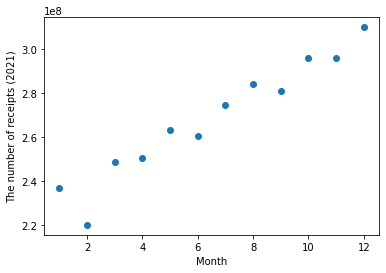

In [3]:
#load the data by day
data = pd.read_csv(r"data_daily.csv").to_numpy()
print('data_by_day:', data.shape)

#plot the data by month
# plt.scatter([i+1 for i in range(len(data[:,0]))], data[:,2])
# plt.xlabel('Days')
# plt.ylabel('The number of receipts')

#convert the data by month
data_mon = np.zeros(shape=(12,))
for i, month in enumerate(data[:,1]):
    data_mon[month-1] += data[i,2]
print('data_by_month:', data_mon.shape)
print(np.amax(data_mon))

#plot the data by month
plt.scatter([i+1 for i in range(len(data_mon))], data_mon)
plt.xlabel('Month')
plt.ylabel('The number of receipts (2021)')

In [38]:
#data normalization
data_mon = data_mon/np.amax(data_mon)
month = np.array([i+1 for i in range(len(data_mon))])/len(data_mon)
print('input: ',month.shape)
print('output: ', data_mon.shape)
print(data_mon)

input:  (12,)
output:  (12,)
[0.76379317 0.70990287 0.80209608 0.80866557 0.84901715 0.84096773
 0.88652095 0.91609755 0.90707323 0.95488447 0.95527156 1.        ]


In [31]:
#define the keras model
#data is too sample, so just create simple NN(2 hidden layers and 15,5 nodes for each layers)
model = Sequential()
model.add(Dense(15, input_dim=1, kernel_initializer='normal', activation='relu')) 
model.add(Dense(5, kernel_initializer='normal', activation='relu'))  
model.add(Dense(1, kernel_initializer='normal'))
model.summary()

#compile model 
model.compile(loss='mean_squared_error', optimizer='adam')

#fit the keras model on the dataset
model.fit(month, data_mon, epochs=200, batch_size=64)    ####

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 15)                30        
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 6         
Total params: 116
Trainable params: 116
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 0.7564
Epoch 2/200
1/1 [==============================] - 0s 999us/step - loss: 0.7542
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 0.7520
Epoch 4/200
1/1 [==============================] - 0s 1000us/step - loss: 0.7499
Epoch 5/200
1/1 [==============================] - 0s 999us/step - lo

1/1 [==============================] - 0s 1ms/step - loss: 0.4372
Epoch 95/200
1/1 [==============================] - 0s 2ms/step - loss: 0.4312
Epoch 96/200
1/1 [==============================] - 0s 1000us/step - loss: 0.4252
Epoch 97/200
1/1 [==============================] - 0s 1ms/step - loss: 0.4191
Epoch 98/200
1/1 [==============================] - 0s 1ms/step - loss: 0.4130
Epoch 99/200
1/1 [==============================] - 0s 1ms/step - loss: 0.4068
Epoch 100/200
1/1 [==============================] - 0s 1ms/step - loss: 0.4005
Epoch 101/200
1/1 [==============================] - 0s 0s/step - loss: 0.3942
Epoch 102/200
1/1 [==============================] - 0s 999us/step - loss: 0.3878
Epoch 103/200
1/1 [==============================] - 0s 2ms/step - loss: 0.3814
Epoch 104/200
1/1 [==============================] - 0s 999us/step - loss: 0.3750
Epoch 105/200
1/1 [==============================] - 0s 0s/step - loss: 0.3685
Epoch 106/200
1/1 [==============================] - 0

1/1 [==============================] - 0s 1000us/step - loss: 0.0026
Epoch 196/200
1/1 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 197/200
1/1 [==============================] - 0s 999us/step - loss: 0.0023
Epoch 198/200
1/1 [==============================] - 0s 999us/step - loss: 0.0022
Epoch 199/200
1/1 [==============================] - 0s 999us/step - loss: 0.0021
Epoch 200/200
1/1 [==============================] - 0s 1ms/step - loss: 0.0020


In [33]:
#save the model if you need to use in the future
# model.save('nn_model.h5')

Text(0, 0.5, 'The number of receipts (2022)')

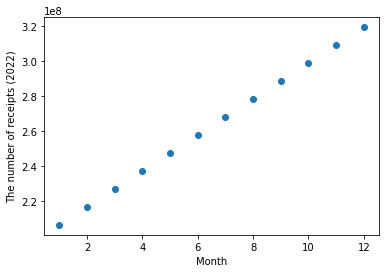

In [39]:
#test the pre-trained paramters by predicting the number of receipts od 2022
predictions = model.predict(month)

#denormalize the data after normalization, 309948684:np.amax(data_mon)
prediction = predictions * 309948684 

#plot the prediction
plt.scatter(np.array([i+1 for i in range(len(data_mon))]), prediction)
plt.xlabel('Month')
plt.ylabel('The number of receipts (2022)')